# 한쪽으로 기울어진 데이터에 가중치 부여하여 Recall(재현율) 올리기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install seaborn

Looking in indexes: http://10.220.235.19/pypi/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import seaborn as sns

### 한쪽으로 기울어진 데이터 만들기 : Y 값 0 : 90%,  1 : 10% 

In [4]:
X = np.random.rand(1000,10)
y1 = np.random.randint(0,1,size=(900))
y2 = np.random.randint(1,2,size=(100))

In [5]:
y = list(y1) + list(y2)

In [6]:
y = np.array(y)

In [7]:
X.shape, y.shape

((1000, 10), (1000,))

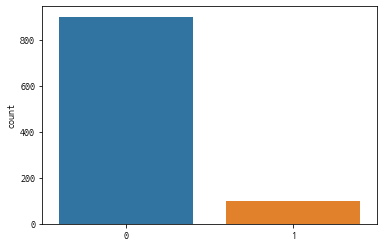

In [8]:
sns.countplot(y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , stratify=y, test_size=0.3, random_state=0)

In [11]:
X_train.shape, X_test.shape

((700, 10), (300, 10))

In [12]:
y_train[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
epochs = 200
batch_size = 24

In [15]:
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

In [16]:
model = Sequential()

In [17]:
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 834
Trainable params: 834
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/200
30/30 [==============================] - 0s 6ms/step - loss: 0.5892 - acc: 0.7057 - val_loss: 0.3972 - val_acc: 0.9000
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3523 - acc: 0.9000 - val_loss: 0.3341 - val_acc: 0.9000
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3315 - acc: 0.9000 - val_loss: 0.3335 - val_acc: 0.9000
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3309 - acc: 0.9000 - val_loss: 0.3340 - val_acc: 0.9000
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3301 - acc: 0.9000 - val_loss: 0.3341 - val_acc: 0.9000
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3293 - acc: 0.9000 - val_loss: 0.3345 - val_acc: 0.9000
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3287 - acc: 0.9000 - val_loss: 0.3352 - val_acc: 0.9000
Epoch 00007: early stopping


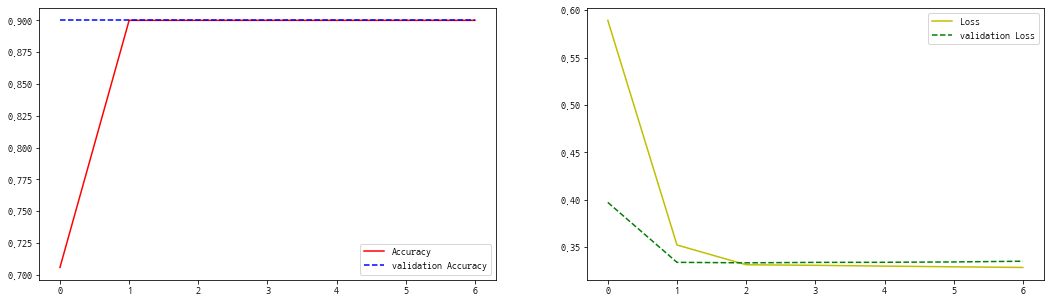

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(history.history['acc'], 'r-', label='Accuracy')
plt.plot(history.history['val_acc'],'b--', label='validation Accuracy')
plt.legend()
plt.subplot(122)
plt.plot(history.history['loss'], 'y-', label='Loss')
plt.plot(history.history['val_loss'],'g--', label='validation Loss')
plt.legend()

In [21]:
from sklearn.metrics import classification_report

In [22]:
y_test_pred = model.predict_classes(X_test, batch_size=12)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
y_test_pred[:3]

array([0, 0, 0])

In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       270
           1       0.00      0.00      0.00        30

    accuracy                           0.90       300
   macro avg       0.45      0.50      0.47       300
weighted avg       0.81      0.90      0.85       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### class 1에 대해서 recall 0% 맞추고 있음.

### model.fit에서 class_weight 옵션을 추가해서 class 1에 대해서 가중치 올려 보자

In [25]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
# class 1에 대해 10배 가중치 부여
class_weight ={0:10, 1:100}

In [27]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, 
                    validation_data=(X_test, y_test), callbacks=[es],
                    class_weight=class_weight)

Epoch 1/200
30/30 [==============================] - 0s 4ms/step - loss: 13.1468 - acc: 0.1986 - val_loss: 0.7335 - val_acc: 0.3700
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 13.1167 - acc: 0.5600 - val_loss: 0.7315 - val_acc: 0.3933
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 12.9650 - acc: 0.4357 - val_loss: 0.7425 - val_acc: 0.3333
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 12.9285 - acc: 0.3186 - val_loss: 0.7340 - val_acc: 0.3733
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 12.9008 - acc: 0.5600 - val_loss: 0.7061 - val_acc: 0.4767
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 12.8970 - acc: 0.5543 - val_loss: 0.7395 - val_acc: 0.3700
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 12.9727 - acc: 0.5471 - val_loss: 0.7110 - val_acc: 0.4700
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 12.

In [28]:
y_test_pred = model.predict_classes(X_test, batch_size=12)

In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.50      0.63       270
           1       0.07      0.37      0.12        30

    accuracy                           0.48       300
   macro avg       0.48      0.43      0.38       300
weighted avg       0.80      0.48      0.58       300



#### class 1에 대한 Reacll 값이 63% 올라갓으나 class 0 에 대한 recall 값은 31%로 떨어짐

### 이번에는 model.fit에서 sample_weight 옵션을 통해 샘플의 가중치를 높여보자

In [30]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [31]:
# class 1에 대해 8배 가중치 부여
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 1] = 8

In [32]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, 
                    validation_data=(X_test, y_test), callbacks=[es],
                    sample_weight=sample_weight)

Epoch 1/200
30/30 [==============================] - 0s 4ms/step - loss: 1.2057 - acc: 0.6714 - val_loss: 0.6456 - val_acc: 0.7767
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1820 - acc: 0.6771 - val_loss: 0.6892 - val_acc: 0.5233
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1777 - acc: 0.7500 - val_loss: 0.6573 - val_acc: 0.7733
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1733 - acc: 0.8629 - val_loss: 0.6375 - val_acc: 0.8400
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1664 - acc: 0.6500 - val_loss: 0.6867 - val_acc: 0.5500
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1677 - acc: 0.6157 - val_loss: 0.6523 - val_acc: 0.7333
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1585 - acc: 0.6357 - val_loss: 0.6613 - val_acc: 0.6900
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1567 - a

In [33]:
y_test_pred = model.predict_classes(X_test, batch_size=12)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       270
           1       0.11      0.23      0.15        30

    accuracy                           0.74       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.82      0.74      0.77       300



#### class 1에 대한 Reacll 값이 27% 올라갓으나 class 0 에 대한 recall 값은 59%로 떨어짐